In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [3]:
df = pd.read_excel("Ball Corp Dataset 2.xlsx", sheet_name= "Ops People Data")
df.head()

Period     Plant  Staffing %  Absenteeism %  Turnover %  \
0  2022_01  Plant_01   -0.031250         0.0720       0.000   
1  2022_02  Plant_01   -0.023438         0.0452       0.000   
2  2022_03  Plant_01    0.015625         0.0456       0.000   
3  2022_04  Plant_01    0.007812         0.0450       0.016   
4  2022_05  Plant_01   -0.015625         0.0648       0.032   

   Turnover 1st Year %  Tenure <2 %  Tenure >10 %  Efficiency %  Spoilage %  \
0                 0.00        0.864         0.032         0.793      0.0171   
1                 0.00        0.863         0.032         0.817      0.0151   
2                 0.00        0.852         0.031         0.816      0.1033   
3                 0.50        0.858         0.031         0.787      0.0243   
4                 0.75        0.864         0.024         0.816      0.0305   

   TRIR safety  HFI quality  <20  20-29  30-39  40-49  50-59   60+  
0          0.0       0.0080  0.0   0.16   0.35   0.26   0.19  0.03  
1          0.0       0.0037  0.0   0.15   0.36   0.26   0.19  0.03  
2          0.0       0.0032  0.0   0.16   0.37   0.25   0.19  0.03  
3          0.0       0.0056  0.0   0.17   0.36   0.25   0.19  0.03  
4          0.0       0.0152  0.0   0.17   0.37   0.24   0.19  0.03

In [4]:
import itertools
import pandas as pd
import statsmodels.api as sm

In [5]:
data.head()

NameError: name 'data' is not defined

In [ ]:
data.columns

In [ ]:
!pip install linearmodels

In [ ]:
from linearmodels.panel import PanelOLS

In [54]:
data['Period'] = pd.to_datetime(data['Period'],format='%Y_%m')
data = data.set_index(['Plant','Period'])
data

Staffing %  Absenteeism %  Turnover %  \
Plant    Period                                              
Plant_01 2022-01-01   -0.031250         0.0720       0.000   
         2022-02-01   -0.023438         0.0452       0.000   
         2022-03-01    0.015625         0.0456       0.000   
         2022-04-01    0.007812         0.0450       0.016   
         2022-05-01   -0.015625         0.0648       0.032   
...                         ...            ...         ...   
Plant_16 2022-11-01    0.000000         0.0530       0.028   
         2022-12-01   -0.009050         0.0420       0.009   
         2023-01-01   -0.026316         0.0386       0.009   
         2023-02-01   -0.030568         0.0357       0.005   
         2023-03-01   -0.030435         0.0422       0.009   

                     Turnover 1st Year %  Tenure <2 %  Tenure >10 %  \
Plant    Period                                                       
Plant_01 2022-01-01                0.000        0.864         0.032   
         2022-02-01                0.000        0.863         0.032   
         2022-03-01                0.000        0.852         0.031   
         2022-04-01                0.500        0.858         0.031   
         2022-05-01                0.750        0.864         0.024   
...                                  ...          ...           ...   
Plant_16 2022-11-01                0.333        0.321         0.367   
         2022-12-01                0.000        0.304         0.373   
         2023-01-01                0.000        0.309         0.364   
         2023-02-01                1.000        0.286         0.364   
         2023-03-01                0.500        0.284         0.365   

                     Efficiency %  <20  20-29  30-39  40-49  50-59   60+  
Plant    Period                                                           
Plant_01 2022-01-01        0.7930  0.0   0.16   0.35   0.26   0.19  0.03  
         2022-02-01        0.8170  0.0   0.15   0.36   0.26   0.19  0.03  
         2022-03-01        0.8160  0.0   0.16   0.37   0.25   0.19  0.03  
         2022-04-01        0.7870  0.0   0.17   0.36   0.25   0.19  0.03  
         2022-05-01        0.8160  0.0   0.17   0.37   0.24   0.19  0.03  
...                           ...  ...    ...    ...    ...    ...   ...  
Plant_16 2022-11-01        0.7119  0.0   0.16   0.24   0.19   0.34  0.06  
         2022-12-01        0.7050  0.0   0.16   0.24   0.20   0.35  0.06  
         2023-01-01        0.7660  0.0   0.16   0.23   0.20   0.35  0.06  
         2023-02-01        0.7604  0.0   0.16   0.24   0.19   0.36  0.05  
         2023-03-01        0.7640  0.0   0.16   0.23   0.20   0.35  0.07  

[240 rows x 13 columns]

In [67]:
# Function to fit OLS model for a given combination of predictors
def fit_ols(data, predictors):
    X = data[list(predictors)]
#     X = sm.add_constant(X)  # Add constant for intercept
    y = data['Efficiency %']
    model = PanelOLS(y, X,entity_effects=True)
    return model

# Get all combinations of predictors
predictors = data.columns.drop('Efficiency %')
all_predictor_combinations = []
for r in range(1, len(predictors) + 1):
    combinations = itertools.combinations(predictors, r)
    all_predictor_combinations.extend(combinations)

# print(all_predictor_combinations)
# Fit models for all combinations
best_model = None
best_rss = float('inf')  # Initialize with infinity
for predictor in all_predictor_combinations:
    model = fit_ols(data, predictor)
    result = model.fit()
    residuals = result.resids  # Residual sum of squares
    rss = (residuals**2).sum()

    if rss < best_rss:
        best_model = result
        best_rss = rss

# Print summary of best model
print(best_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:           Efficiency %   R-squared:                        0.1540
Estimator:                   PanelOLS   R-squared (Between):             -0.5167
No. Observations:                 240   R-squared (Within):               0.1540
Date:                Wed, Apr 03 2024   R-squared (Overall):             -0.5143
Time:                        16:39:07   Log-likelihood                    420.61
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.2151
Entities:                          16   P-value                           0.0003
Avg Obs:                       15.000   Distribution:                  F(12,212)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust):             3.2151
                            

In [85]:
df.columns

Index(['Period', 'Plant', 'Staffing %', 'Absenteeism %', 'Turnover %',
       'Turnover 1st Year %', 'Tenure <2 %', 'Tenure >10 %', 'Efficiency %',
       'Spoilage %', 'TRIR safety', 'HFI quality', '<20', '20-29', '30-39',
       '40-49', '50-59', '60+'],
      dtype='object')

In [17]:
data = df.copy()
columns_to_drop = ["Efficiency %", 'TRIR safety','HFI quality','Period', '<20', '20-29', '30-39',
       '40-49', '50-59', '60+']
data = data.drop(columns=columns_to_drop)
data.head()

Plant  Staffing %  Absenteeism %  Turnover %  Turnover 1st Year %  \
0  Plant_01   -0.031250         0.0720       0.000                 0.00   
1  Plant_01   -0.023438         0.0452       0.000                 0.00   
2  Plant_01    0.015625         0.0456       0.000                 0.00   
3  Plant_01    0.007812         0.0450       0.016                 0.50   
4  Plant_01   -0.015625         0.0648       0.032                 0.75   

   Tenure <2 %  Tenure >10 %  Spoilage %  
0        0.864         0.032      0.0171  
1        0.863         0.032      0.0151  
2        0.852         0.031      0.1033  
3        0.858         0.031      0.0243  
4        0.864         0.024      0.0305

In [18]:
# Function to fit OLS model for a given combination of predictors
def fit_ols(data, predictors):
    X = data[list(predictors)]
    X = sm.add_constant(X)  # Add constant for intercept
    y = data['Spoilage %']
    model = sm.OLS(y, X).fit()
    return model

# Get all combinations of predictors
predictors = data.columns.drop('Spoilage %')
all_predictor_combinations = []
for r in range(1, len(predictors) + 1):
    combinations = itertools.combinations(predictors, r)
    all_predictor_combinations.extend(combinations)

# print(all_predictor_combinations)
# Fit models for all combinations
best_model = None
best_r_squared = -float('inf')
# best_rss = float('inf')  # Initialize with infinity
for predictors in all_predictor_combinations:
    model = fit_ols(data, predictors)
    r_squared = model.rsquared  # R-squared value
    if r_squared > best_r_squared:
        best_model = model
        best_r_squared = r_squared
#     rss = model.ssr  # Residual sum of squares
#     if rss < best_rss:
#         best_model = model
#         best_rss = rss

# Print summary of best model
print(best_model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [9]:
import pandas as pd
import statsmodels.api as sm
import itertools

# Load your data
# Example:
# data = pd.read_csv('your_data.csv')

# Function to fit fixed effects model for a given combination of predictors
def fit_fixed_effects(data, predictors):
    # Convert predictors to a list
    predictors = list(predictors)
    
    # Add entity fixed effects
    data = data.set_index(['Plant','Period'])
    X = sm.add_constant(X)
    
    # Add other predictors
    X[predictors] = data[predictors]
    
    # Dependent variable
    y = data['Efficiency %']
    
    # Fit the model
    model = PanelOLS(y, X).fit()
    return model

# Get all combinations of predictors
predictors = data.columns.drop(['Efficiency %','Plant'])  # Assuming 'entity' is the entity identifier
all_predictor_combinations = []
for r in range(1, len(predictors) + 1):
    combinations = itertools.combinations(predictors, r)
    all_predictor_combinations.extend(combinations)

# Fit models for all combinations
best_model = None
best_rss = float('inf')  # Initialize with infinity
for predictors_combination in all_predictor_combinations:
    model = fit_fixed_effects(data, predictors_combination)
    rss = model.ssr  # Residual sum of squares
    if rss < best_rss:
        best_model = model
        best_rss = rss

# Print summary of best model
print(best_model.summary())


KeyError: "['Efficiency %', 'Plant'] not found in axis"

In [36]:
data.dtypes

Period                  object
Plant                   object
Staffing %             float64
Absenteeism %          float64
Turnover %             float64
Turnover 1st Year %    float64
Tenure <2 %            float64
Tenure >10 %           float64
Efficiency %           float64
<20                    float64
20-29                  float64
30-39                  float64
40-49                  float64
50-59                  float64
60+                    float64
dtype: object

In [10]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

def line_graph(col):

    # Plotting the data
    fig = go.Figure()

    # Get a list of unique plants
    plants = df['Plant'].unique()

    # Define a colormap with enough distinct colors for the number of plants
    colors = [f'rgb({int(255*c[0])}, {int(255*c[1])}, {int(255*c[2])})' for c in plt.cm.tab20(np.linspace(0, 1, len(plants)))]

    # Create a color dictionary for mapping plant names to colors
    color_dict = dict(zip(plants, colors))

    # Iterate over unique plants and plot staffing percentage for each
    for plant in plants:
        plant_data = df[df['Plant'] == plant]
        fig.add_trace(go.Scatter(x=plant_data['Period'], y=plant_data[col], mode='lines', name=plant, line=dict(color=color_dict[plant])))

    # Adding labels and title
    fig.update_layout(
        title=col + ' by Period',
        xaxis=dict(title='Period', tickangle=45),  # Set tickangle to 45
        yaxis=dict(title=col),
        plot_bgcolor='rgba(0,0,0,0)',  # Set background color to fully transparent
        title_x=0.5  # Center the title
    )

    # Hide gridlines
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)

    # Place legend at the bottom with a single line
    fig.update_layout(
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

#     fig.show()
    return fig

In [5]:
cols = df.columns.to_list()
cols = cols[2:]
cols

['Staffing %',
 'Absenteeism %',
 'Turnover %',
 'Turnover 1st Year %',
 'Tenure <2 %',
 'Tenure >10 %',
 'Efficiency %',
 'Spoilage %',
 'TRIR safety',
 'HFI quality']

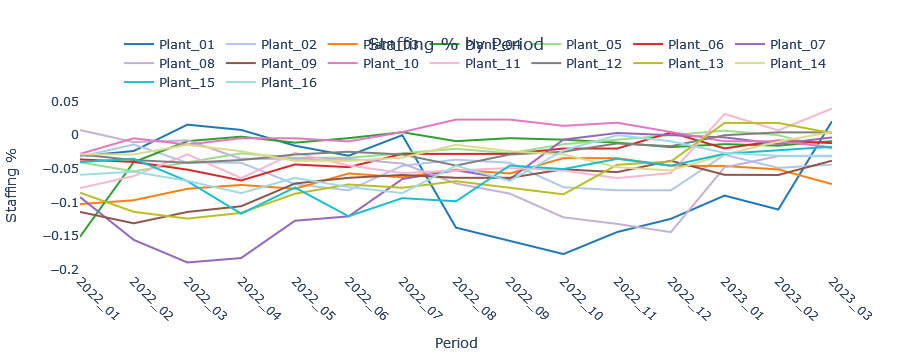

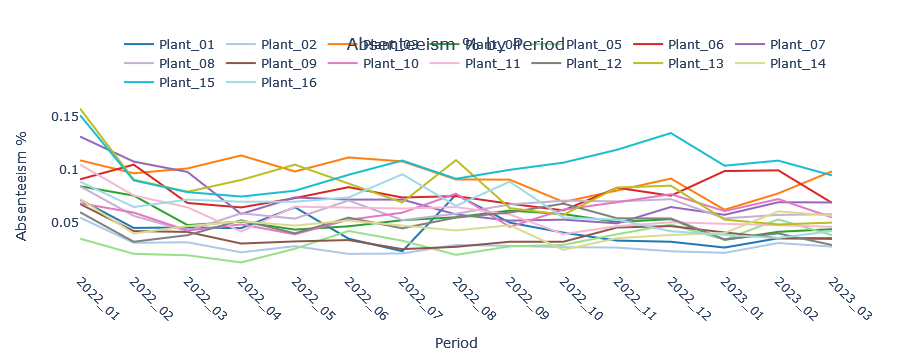

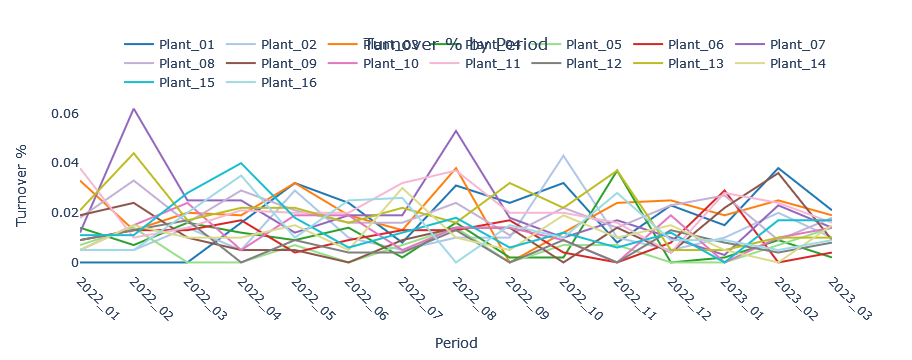

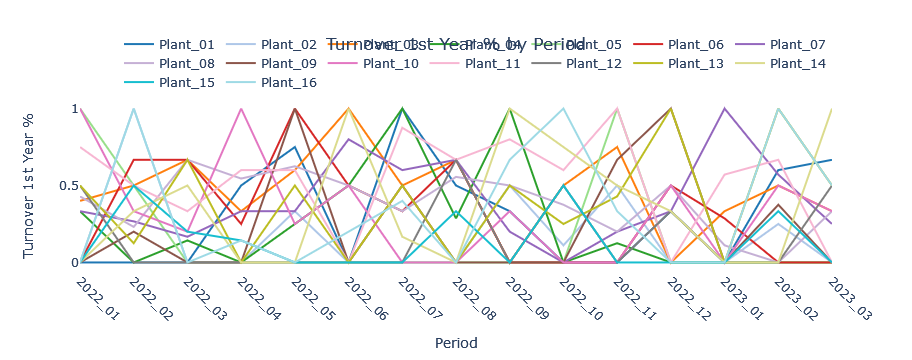

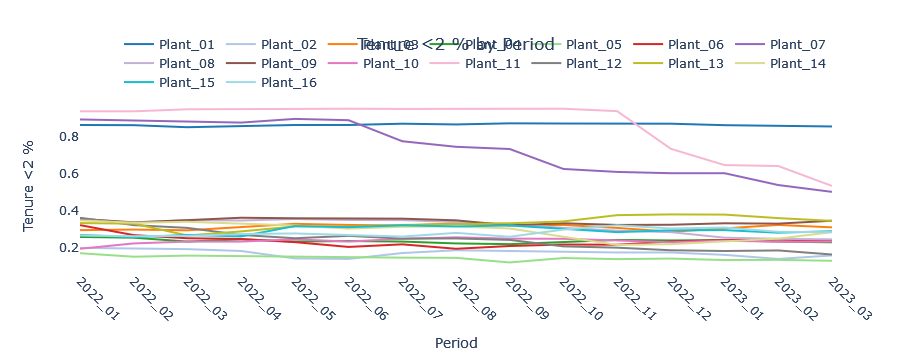

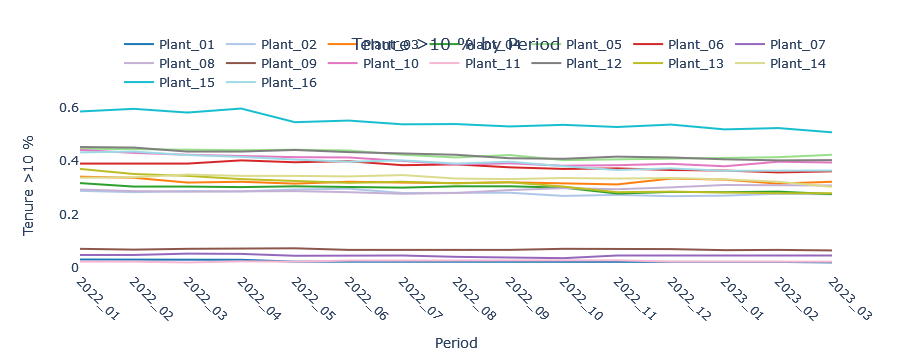

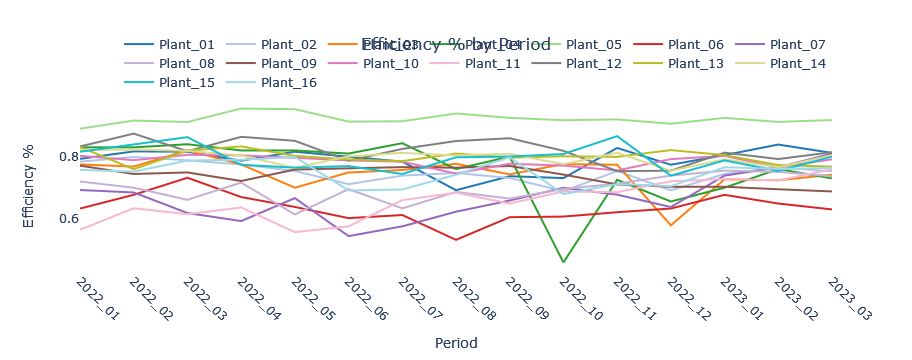

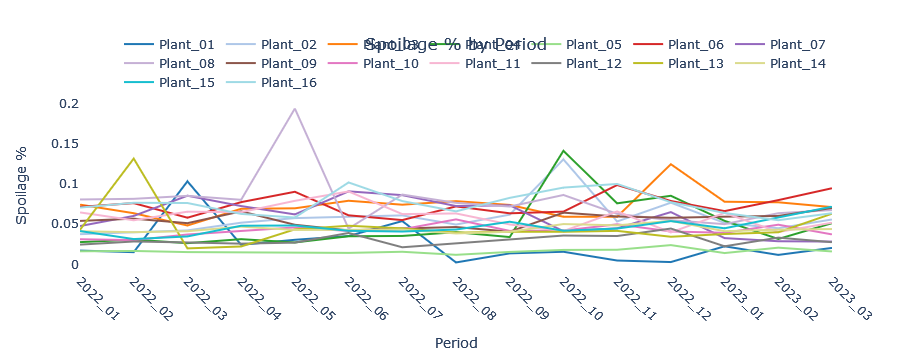

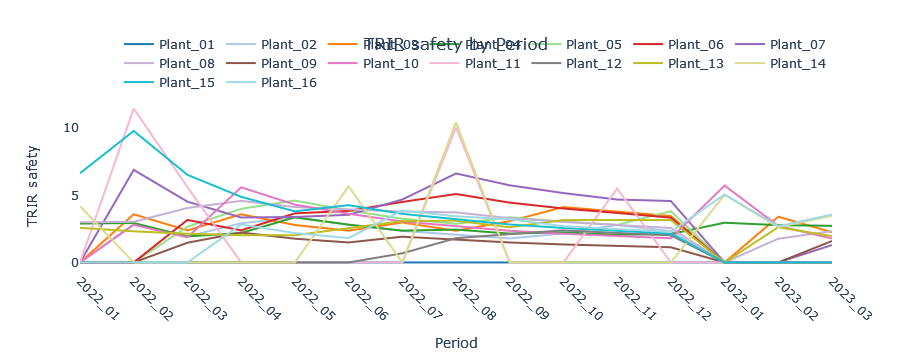

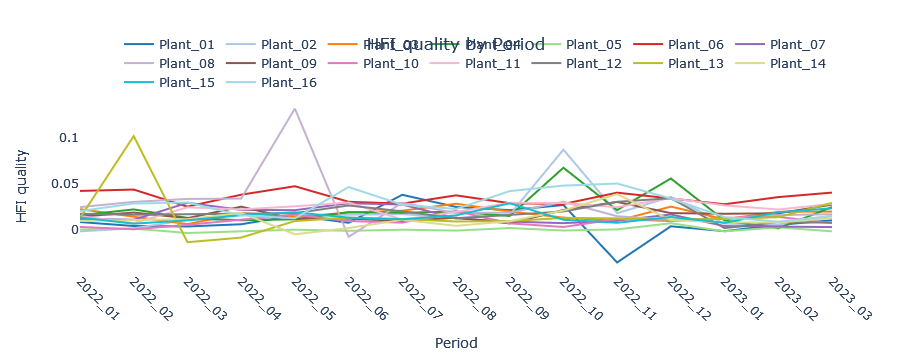

In [6]:
# col = "Staffing %"
for col in cols:
    fig = line_graph(col)
    fig.show()